# Gabor filters

A Gabor filter is a linear filter frequently used in image processing for texture analysis. It represents an important tool to examine whether there is any specific spatial frequency content in the image along specific directions and in a localized region around the point of interest (the center of the filter). For this purpose, a bank of Gabor filters is considered, having different orientations and spatial frequencies.

From a mathematical perspective, a Gabor filter is a 2D Gaussian kernel function modulated by a cosine/sine plane wave. In its complex form, the filter has both real (even) and imaginary (odd) components, representing orthogonal directions. The Gaussian envelope comprehends some parameters of the filter, particularly its: center ($x_0, y_0$), orientation $\theta$, extension $\sigma$ (characterizing the dimension of the envelope along $x_{\theta}$, i.e. $\sigma_x = \sigma$) and elongation $p > 1$ (defined along $y_{\theta}$ because $\sigma_y = p \cdot \sigma$). The harmonic modulation, instead, describes the phase $\phi$ of the filter and its spatial frequency $k$ (defined along $x_{\theta}$).

$$
G(x,y;\sigma,\theta,f,p,\phi,x_0,y_0) = exp \left( -\frac{x_{\theta}^2 + (y_{\theta}/p)^2}{2 \sigma^2} \right) \cdot \left[ cos(x_{\theta}k + \phi) + j \cdot sin(x_{\theta}k + \phi) \right]
$$

<center><img src=https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/TRAPP1/gabrea.gif width=220, align='center'><img src=https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/TRAPP1/gabimg.gif width=220, align='center'><img src=https://s3-us-west-2.amazonaws.com/courses-images-archive-read-only/wp-content/uploads/sites/924/2015/11/25202405/CNX_Precalc_Figure_10_04_0042.jpg width=260, align='right'></center>

where:

$
\begin{cases}
  x_{\theta} = (x - x_0) \cdot cos(\theta) + (y - y_0) \cdot sin(\theta) \\
  y_{\theta} = - (x - x_0) \cdot sin(\theta) + (y - y_0) \cdot cos(\theta)
\end{cases}
$


Here we will generate and visualise some Gabor filters (both even and odd parts separately) by setting some kernel parameters. Note that we also consider another parameter, the kernel threshold, representing the minimum absolute value the filter must have (i.e. we set to zero all kernel values which are, in modulus, smaller than the threshold). This is useful if we use such kernel to specify the synaptic weights of a node in a neural network, in order to limit the computational load of synapse definitions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def Gabor(space, center, sigma, sf, func=np.cos, theta=0, elongation=2, phase=0, threshold=None):
    [x, y] = np.meshgrid(range(space[0]), range(space[1]))
    (center_x, center_y) = center
    x -= center_x
    y -= center_y

    x_theta = x * np.cos(np.deg2rad(theta)) + y * np.sin(np.deg2rad(theta))
    y_theta = -x * np.sin(np.deg2rad(theta)) + y * np.cos(np.deg2rad(theta))

    if phase:
      phase = np.deg2rad(phase) + np.pi

    symmetry = func(x_theta * sf + phase)
    gauss = np.exp(-(x_theta ** 2 + (y_theta / elongation) ** 2) / (2 * sigma ** 2))
    # Note: sigma_y = sigma_x * elongation = sigma

    gabor = gauss * symmetry
    
    if threshold:
        gabor[np.abs(gabor) < threshold] = 0
    return gabor

In [3]:
def show_filter(kernel, figsize=None, vmin=-1, vmax=1, origin='lower', axis_off=True, show_colorbar=False, **kwargs):
    # utility function to show image
    plt.figure(figsize=figsize)
    if axis_off:
      plt.axis('off')
    img = plt.imshow(kernel, cmap='gray', origin=origin, vmin=vmin, vmax=vmax, **kwargs)
    if show_colorbar:
      plt.colorbar(img, shrink=0.9, ticks=[vmin, (vmax+vmin)/2, vmax])
    plt.show()

## Interactive kernel demo

In [4]:
from ipywidgets import interact

In [5]:
# Define sets of parameters for interactive sin/cos Gabor kernels
kernel_space = (251,251)
kernel_center = (125,125)
sigma_range = (4,22,2)              # range of sigma values
theta_range = (0,180-18,18)         # range of theta values
sf_range = (0.1,1.,0.1)             # range of sf values
kernel_th = 0.05
# N_sigma = (sigma_range[1]-sigma_range[0])/sigma_range[2] + 1
# N_theta = (theta_range[1]-theta_range[0])/theta_range[2] + 1
# N_k = (sf_range[1]-sf_range[0])/sf_range[2] + 1
# print(N_sigma, N_theta, N_k)

In [6]:
def demoGabor_real(sigma, theta, k_0):
    kernel = Gabor(kernel_space, kernel_center, sigma, k_0, theta=theta, func=np.cos, threshold=kernel_th)
    show_filter(kernel)
interact(demoGabor_real, sigma=sigma_range, theta=theta_range, k_0=sf_range)

interactive(children=(IntSlider(value=12, description='sigma', max=22, min=4, step=2), IntSlider(value=72, des…

<function __main__.demoGabor_real(sigma, theta, k_0)>

In [7]:
def demoGabor_imaginary(sigma, theta, k_0):
    kernel = Gabor(kernel_space, kernel_center, sigma, k_0, theta=theta, func=np.sin, threshold=kernel_th)
    show_filter(kernel)
interact(demoGabor_imaginary, sigma=sigma_range, theta=theta_range, k_0=sf_range)

interactive(children=(IntSlider(value=12, description='sigma', max=22, min=4, step=2), IntSlider(value=72, des…

<function __main__.demoGabor_imaginary(sigma, theta, k_0)>

## Visualise bank of filters

In [8]:
# Define sets of parameters for the banks of Gabor filters
kernel_space = (251,251)
kernel_center = (125,125)
sigma = 20
theta_range = (0,150,30)       # range of theta values
sf_range = (0.1,0.6,0.1)       # range of sf values
theta = np.arange(*theta_range)    # all theta values
sf = np.arange(*sf_range)          # all sf values
kernel_th = 0.1

In [9]:
sinFilterBank = []
cosFilterBank = []
gaborParam = {'space':kernel_space, 'center':kernel_center,
              'sigma':sigma, 'sf':0, 'theta':0,
              'elongation':2, 'phase':0, 'threshold':kernel_th}
for freq in sf:
    gaborParam['sf'] = freq
    sinFilter_ang = []
    cosFilter_ang = []
    for angle in theta:
        gaborParam['theta'] = angle
        sinGabor = Gabor(func=np.sin, **gaborParam)
        sinFilter_ang.append(sinGabor)
        cosGabor = Gabor(func=np.cos, **gaborParam)
        cosFilter_ang.append(cosGabor)
    sinFilterBank.append(sinFilter_ang)
    cosFilterBank.append(cosFilter_ang)

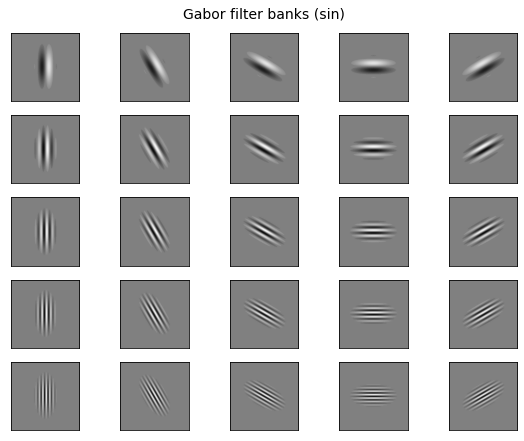

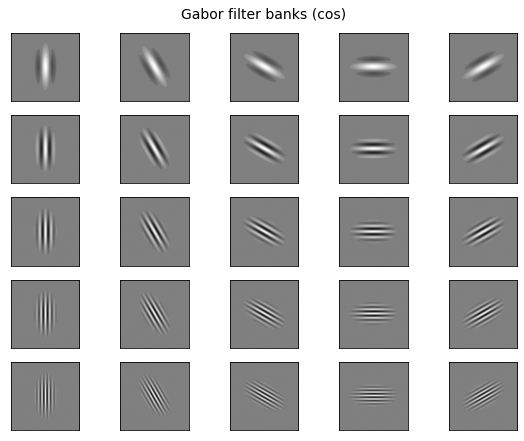

In [10]:
n_angles = len(theta)
n_freqs = len(sf)

fig, axes = plt.subplots(nrows=n_freqs, ncols=n_angles, figsize=(8,6))
plt.gray()
fig.suptitle('Gabor filter banks (sin)', fontsize=14)
for k_freq in range(n_freqs):
  filters = sinFilterBank[k_freq]
  for k_ang, kernel in zip(range(n_angles), filters):
    axes[k_freq][k_ang].imshow(kernel, origin='lower', vmin=-1, vmax=1)
    axes[k_freq][k_ang].set_xticks([])
    axes[k_freq][k_ang].set_yticks([])
fig.tight_layout()
fig.subplots_adjust(bottom=0, top=0.92)
plt.show()

fig, axes = plt.subplots(nrows=n_freqs, ncols=n_angles, figsize=(8,6))
plt.gray()
fig.suptitle('Gabor filter banks (cos)', fontsize=14)
for k_freq in range(n_freqs):
  filters = cosFilterBank[k_freq]
  for k_ang, kernel in zip(range(n_angles), filters):
    axes[k_freq][k_ang].imshow(kernel, origin='lower', vmin=-1, vmax=1)
    axes[k_freq][k_ang].set_xticks([])
    axes[k_freq][k_ang].set_yticks([])
fig.tight_layout()
fig.subplots_adjust(bottom=0, top=0.92)
plt.show()

## Apply filter to zebra

In [11]:
from skimage.color import rgb2gray
from scipy.signal import convolve2d

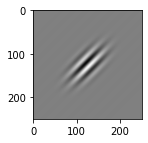

In [12]:
kernel_space = (251,251)
kernel_center = (125,125)
sigma = 16
theta = 45
k_0 = 0.3
kernel_th = 0

kernel = Gabor(kernel_space, kernel_center, sigma, k_0, theta=theta, func=np.sin, threshold=kernel_th)

show_filter(kernel, origin='upper', figsize=(2,2), axis_off=False)
# Note that in this case we visualise the kernel with the origin of the y axis
# at the top because also the image is shown in this way. This is necessary
# because the image by default is saved upside-down (with reversed y-axis),
# meaning that the bottom-left part of the image is in the upper-left part
# of the array.

--2022-11-28 13:40:28--  https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/Equus_quagga.jpg/1200px-Equus_quagga.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204729 (200K) [image/jpeg]
Saving to: ‘zebra.jpg’

zebra.jpg           100%[===================>] 199.93K  --.-KB/s    in 0.04s   

2022-11-28 13:40:28 (5.30 MB/s) - ‘zebra.jpg’ saved [204729/204729]



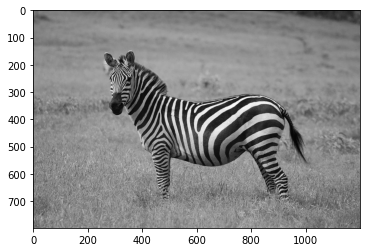

In [13]:
!wget -O zebra.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/Equus_quagga.jpg/1200px-Equus_quagga.jpg
zebra = rgb2gray(plt.imread('zebra.jpg'))

plt.figure()
plt.imshow(zebra, cmap='gray', origin='upper')
plt.show()

CPU times: user 3min 5s, sys: 1.03 s, total: 3min 6s
Wall time: 3min 10s


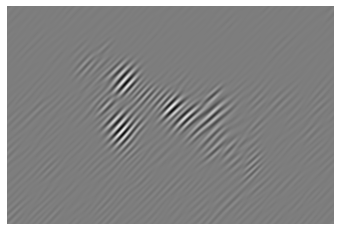

In [14]:
# Note: this cell will take about 3 minutes to run, be patient...
%time result = convolve2d(zebra, kernel, mode='same', boundary='fill', fillvalue=0)

plt.figure()
plt.axis('off')
plt.imshow(result)
plt.show()

## Simple vs Complex cells

In [15]:
def show_quadrature_filters(kernel_cos, kernel_sin, figsize=(5,2), origin='lower', vmin=-1, vmax=1, show_colorbar=False, **kwargs):
    fig = plt.figure(figsize=figsize)
    plt.suptitle('Pair of quadrature filters', fontsize=14)

    plt.subplot(121)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Even', fontsize=10)
    plt.imshow(kernel_cos, origin=origin, cmap='gray', vmin=vmin, vmax=vmax, **kwargs)

    plt.subplot(122)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Odd', fontsize=10)
    img = plt.imshow(kernel_sin, origin=origin, cmap='gray', vmin=vmin, vmax=vmax, **kwargs)
    
    if show_colorbar:
      plt.colorbar(img, shrink=0.9, ticks=[vmin, (vmax+vmin)/2, vmax])
    plt.tight_layout()
    plt.subplots_adjust(bottom=0, top=0.85)
    plt.show()

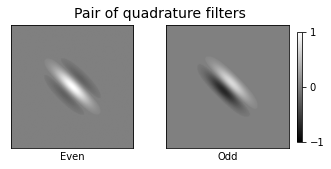

In [16]:
kernel_space = (251,251)
kernel_center = (125,125)
sigma = 16
theta = 45
k_0 = 0.1
kernel_th = 0.05

kernel_cos = Gabor(kernel_space, kernel_center, sigma, k_0, theta=theta, func=np.cos, threshold=kernel_th)
kernel_sin = Gabor(kernel_space, kernel_center, sigma, k_0, theta=theta, func=np.sin, threshold=kernel_th)

show_quadrature_filters(kernel_cos, kernel_sin, show_colorbar=True)

In [17]:
def Sinusoid(dim, A, omega, phi=0):
    # Generate Sinusoid grating
    radius = (int(dim[0]/2), int(dim[1]/2))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))
    return A * np.cos(omega[0] * x  + omega[1] * y + phi)

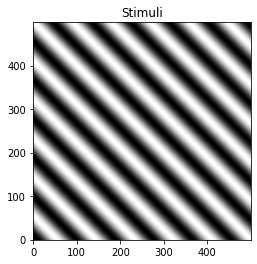

In [18]:
stim_shape = (500,500)
stim_angle = np.pi/4 + np.pi
omega = (k_0 * np.sin(stim_angle), k_0 * np.cos(stim_angle))
amplitude = 1

sinusoid = Sinusoid(stim_shape, amplitude, omega)

plt.figure()
plt.imshow(sinusoid, origin='lower', cmap='gray')
plt.title('Stimuli')
plt.show()

In [19]:
# Note: this cell will take about 2 minutes to run (due to convolutions), be patient...
%%time
response_cos = convolve2d(sinusoid, 
                          kernel_cos, mode='same', boundary='fill', fillvalue=0)
response_sin = convolve2d(sinusoid, kernel_sin, mode='same', boundary='fill', fillvalue=0)

CPU times: user 1min 30s, sys: 560 ms, total: 1min 31s
Wall time: 1min 30s


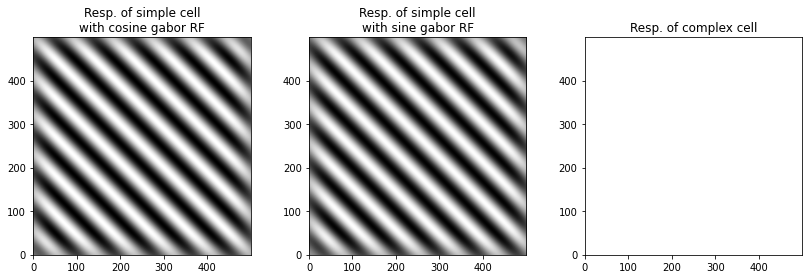

In [20]:
response_energy = response_cos**2 + response_sin**2

v_min, v_max = min(response_cos.min(), response_sin.min()), max(response_cos.max(), response_sin.max())
plt.figure(figsize=(14,4))
plt.subplot(131)
plt.imshow(response_cos, origin='lower', cmap='gray', vmin=v_min, vmax=v_max)
plt.title('Resp. of simple cell\nwith cosine gabor RF')
plt.subplot(132)
plt.imshow(response_sin, origin='lower', cmap='gray', vmin=v_min, vmax=v_max)
plt.title('Resp. of simple cell\nwith sine gabor RF')
plt.subplot(133)
plt.imshow(response_energy, origin='lower', cmap='gray', vmin=v_min, vmax=v_max)
plt.title('Resp. of complex cell')
plt.show()

## Find filter parameters

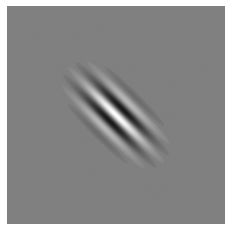

In [21]:
kernel_space = (251,251)
kernel_center = (125,125)
sigma = 16
theta = 45
k_0 = 0.3
kernel_th = 0.05

unknownGabor = Gabor(kernel_space, kernel_center, sigma, k_0, theta=theta, func=np.cos, threshold=kernel_th)

show_filter(unknownGabor)

In [22]:
# You can use sinusoid as a stimuli
# For example:
stim_shape = unknownGabor.shape
possible_angles = np.linspace(0, 180, 8, endpoint=False)
possible_freqs = np.linspace(0.1, 0.6, 6, endpoint=False)
stim_phi = 0
amplitude = 1

In [23]:
responses = np.zeros((len(possible_angles), len(possible_freqs)))
# print('Strength of responses:')
for k_ang, angle in enumerate(possible_angles):
    # print('  Angle %d:' % angle)
    stim_angle = np.deg2rad(angle) + np.pi
    for k_sf, sf in enumerate(possible_freqs):
        stim_sf = (sf * np.sin(stim_angle), sf * np.cos(stim_angle))
        sinusoid = Sinusoid(stim_shape, amplitude, stim_sf, phi=stim_phi)
        resp = convolve2d(sinusoid, unknownGabor, mode='valid')
        # print('    Frequency {}: response is {}'.format(np.round(sf, 2), np.round(resp.max(), 2)))
        responses[k_ang, k_sf] = np.round(resp.max(), 2)
k_ang_win, k_sf_win = np.where(responses == responses.max())
print('Selected angle and spatial frequency are {}° and {}cyc/deg.'.format(
    round(possible_angles[k_ang_win][0], 1), round(possible_freqs[k_sf_win][0], 1)))

Selected angle and spatial frequency are 45.0° and 0.3cyc/deg.
